##**Notebook PC#09 - Part 2**
## Autoencoder training and manifold visualization for the MNIST database.
## Code produced by previous students of IA353. Thank you for making PC#09 (Part 2) still more complete and informative.

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Gabriel Toffanetto França da Rocha - 289320<br>
**Aluno(a):** Maria Fernanda Paulino Gomes - 206745<br>

### Loading the main libraries

In [ ]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Conv2DTranspose, Reshape
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

### Reading the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.
X = x_train.reshape((x_train.shape[0], -1))

### Convolutional Autoencoder

The dense layers of Part 1 were replaced by convolutional layers, which promotes a reduction in the total number of adjustable weights.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu'),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

autoencoder = Sequential([encoder, decoder])
autoencoder.summary(expand_nested=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2)                 393922    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d_16 (Conv2D)         (None, 28, 28, 8)         80       |
|                                                               |
| max_pooling2d_10 (MaxPool  (None, 14, 14, 8)         0        |
| ing2D)                                                        |
|                                                               |
| conv2d_17 (Conv2D)         (None, 14, 14, 16)        1168     |
|                                                               |
| max_pooling2d_11 (MaxPool  (None, 7, 7, 16)          0        |
| ing2D)                                                        |
|                                                               |
| conv2d_18 (Conv2D)         (None, 7, 7, 32)         

In [ ]:
autoencoder.compile(optimizer = "adam", loss = "mse")

history = autoencoder.fit(x_train.reshape((-1, 28, 28, 1)), x_train.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

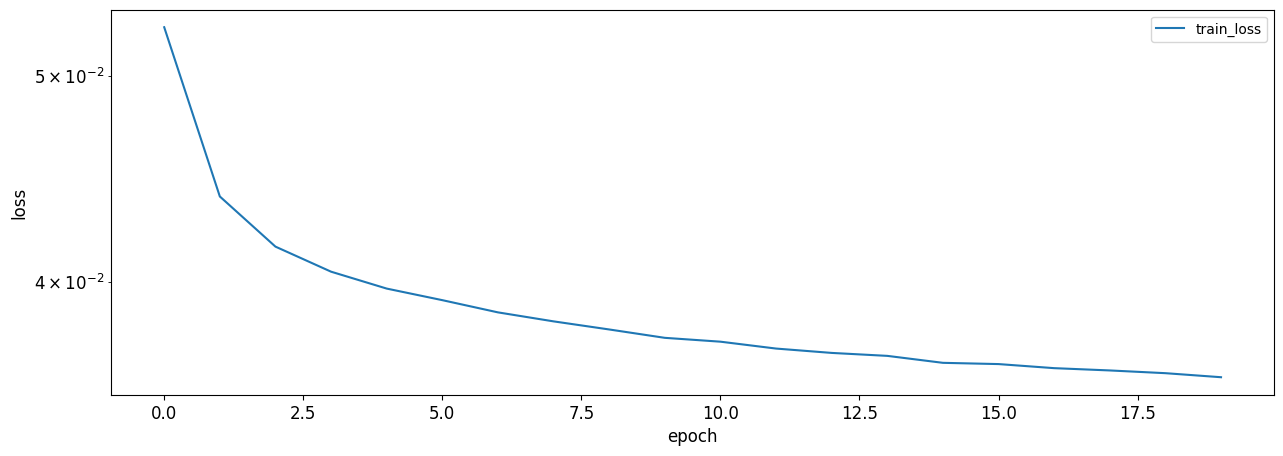

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

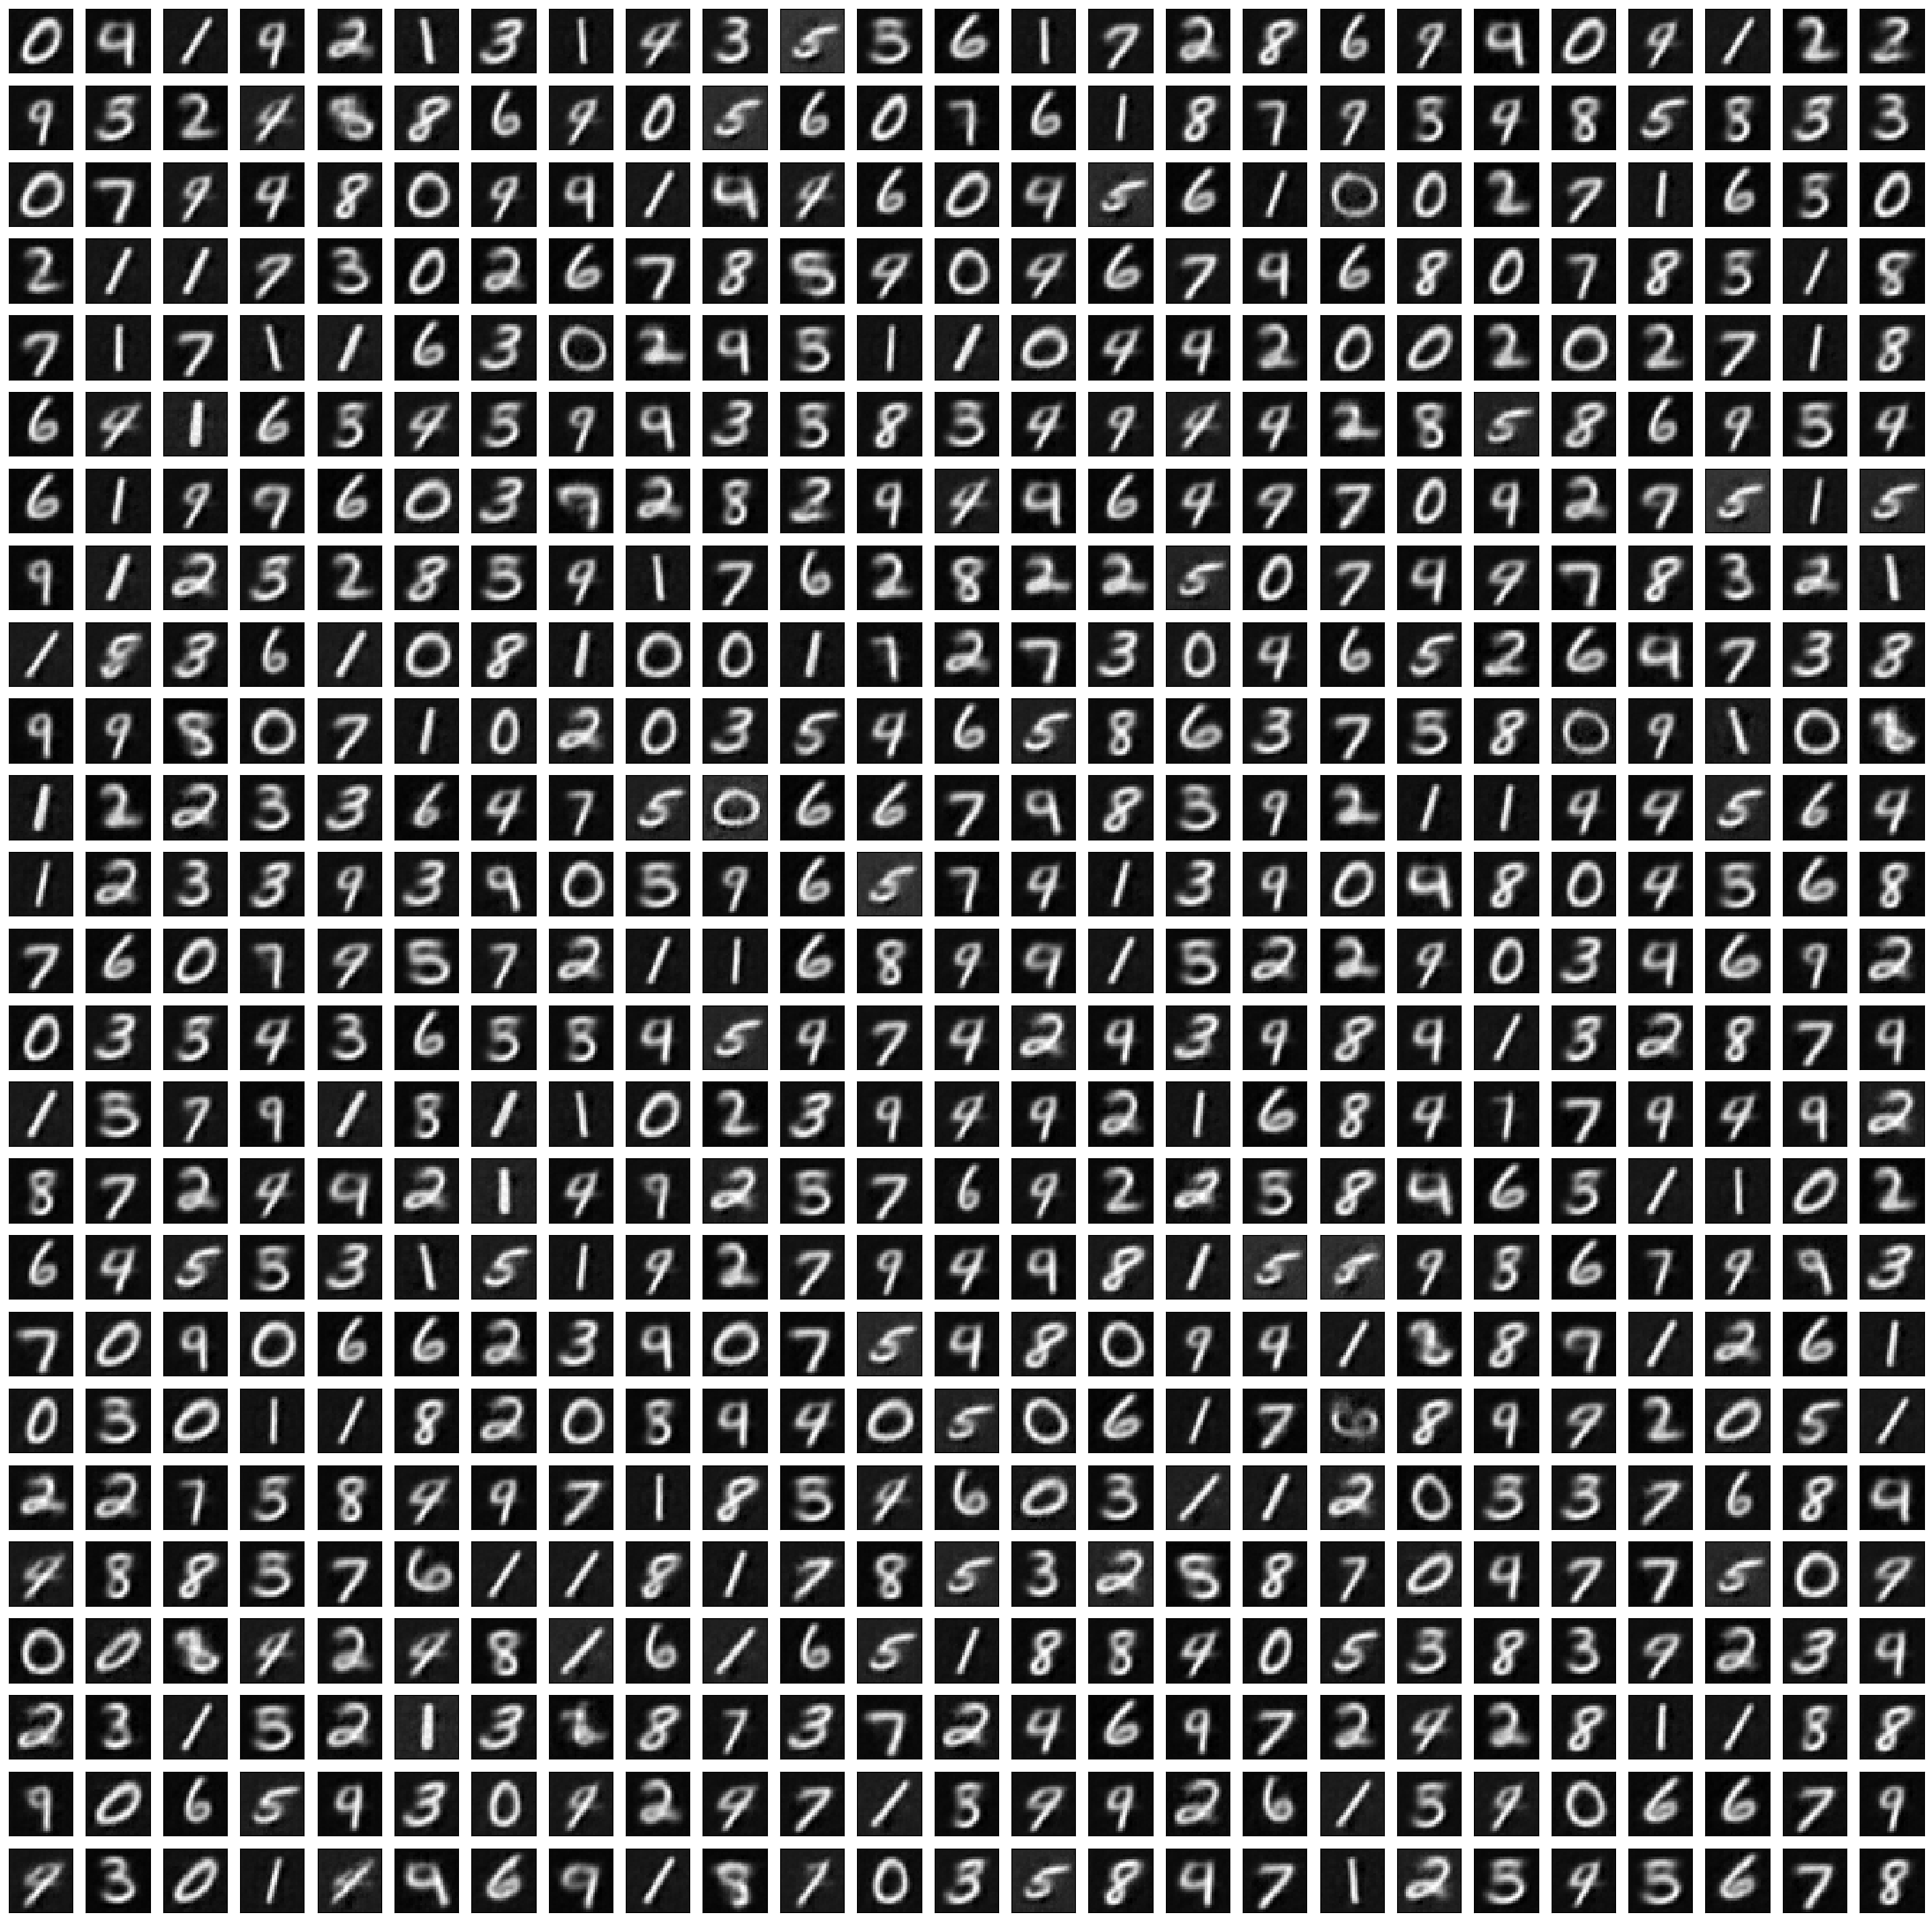

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = autoencoder.predict(X[:26*26].reshape((-1, 28, 28, 1)), verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

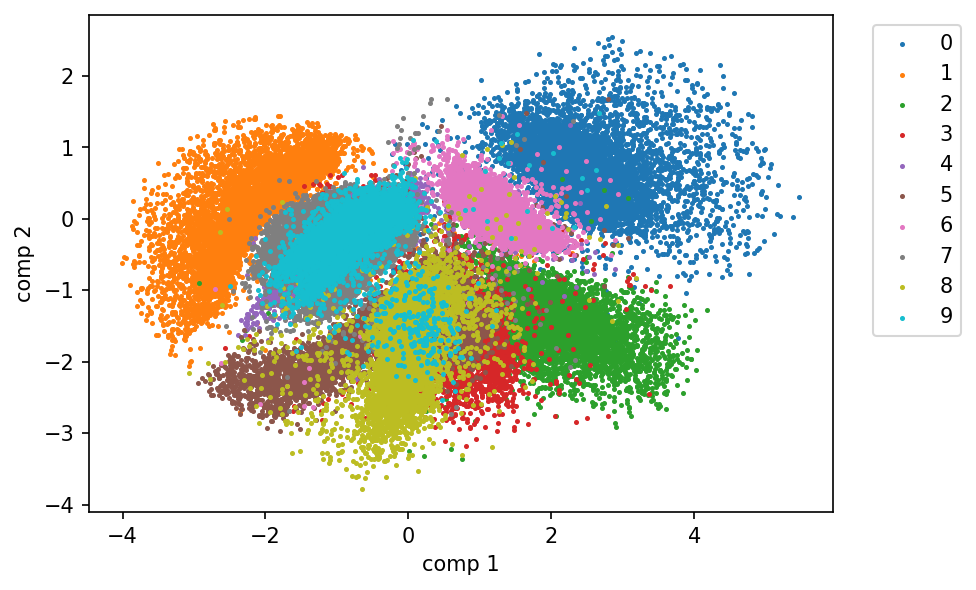

In [ ]:
fig, ax = plt.subplots(dpi=150)

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

<font color="green">
Atividade (a) <br>
Compare a disposição dos códigos de dígitos das 10 classes com aquela da Parte 1. Procure justificar a diferença nos resultados.
</font>

**Resposta:**

Relembrando a distribuição da Parte 1:



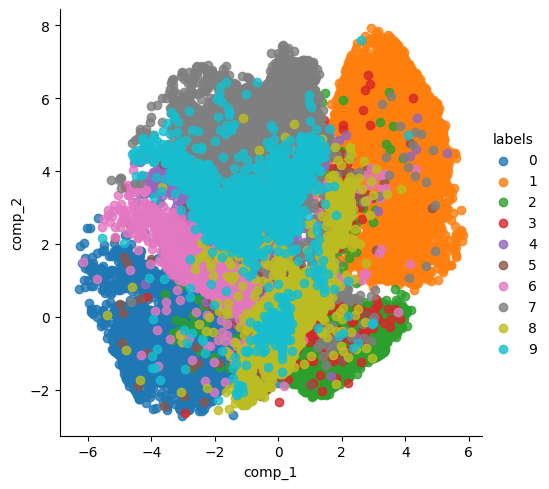

Na parte 1, utilizou-se um autoencoder baseado em redes MLP com função de ativação tangente hiperbólica. Já aqui, utilizou-se de camadas convolucionais com função de ativação ReLU. Dessa forma, as redes realizam mapeamento diferentes, devido à sua estruturação, e também à função utilizada para dar não-linearidade, levando assim a representações diferentes do código gerado pelo encoder.

Observa-se no código do autoencoder da parte 1, classes mais sobrepostas, e pontos mais aglutinados, enquanto na parte 2, as classes se mostram mais separados e os dados mais esparsos dentro dos clusters, passando a existir até mesmo fronteiras com espaços vazios entre as classes.

---


In [ ]:
def circle_path(radius, center, n_images, ax, *args, **kwargs):
    x0, y0 = center

    pts = np.zeros((n_images, 2))
    pts[:, 0] = radius * np.cos(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + x0
    pts[:, 1] = radius * np.sin(2 * np.pi * np.linspace(1, n_images, num=n_images)/n_images) + y0

    path = decoder.predict(pts, verbose=0).reshape((-1, 28, 28))

    for i in range(n_images):
        ax.add_artist(AnnotationBbox(OffsetImage(path[i], cmap='binary_r', zoom=0.4), pts[i], frameon=False))

In [ ]:
def clear_artists(ax):
    for artist in ax.artists:
        artist.remove()

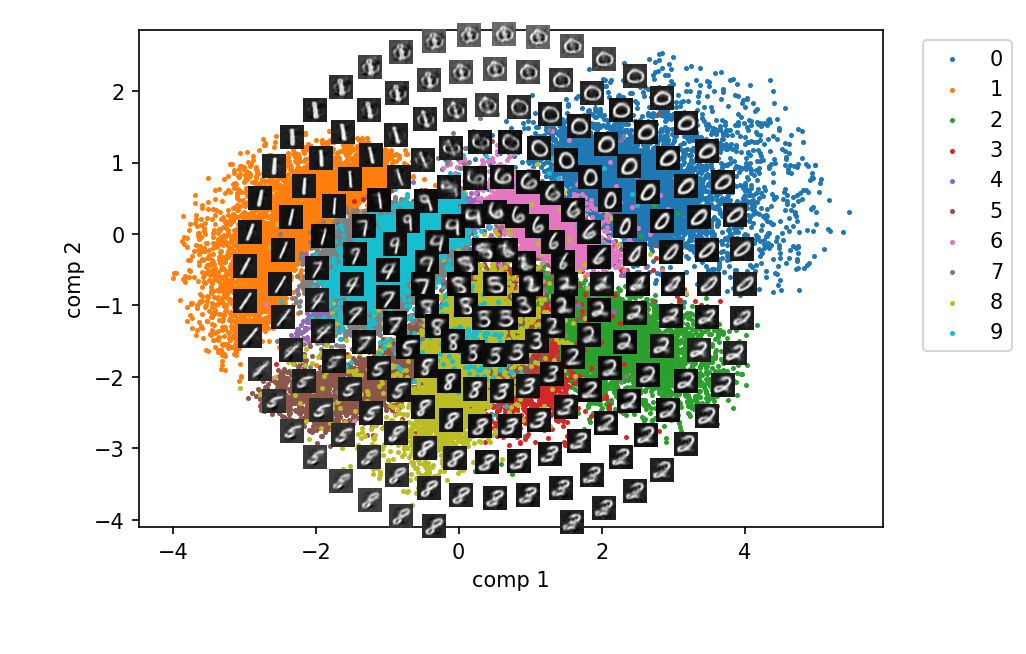

In [ ]:
clear_artists(ax)

x0 = 0.5
y0 = -0.7

circle_path(radius=3.5, center=(x0, y0), n_images=45, ax=ax)
circle_path(radius=3.0, center=(x0, y0), n_images=40, ax=ax)
circle_path(radius=2.5, center=(x0, y0), n_images=35, ax=ax)
circle_path(radius=2, center=(x0, y0), n_images=30, ax=ax)
circle_path(radius=1.5, center=(x0, y0), n_images=25, ax=ax)
circle_path(radius=1, center=(x0, y0), n_images=20, ax=ax)
circle_path(radius=0.5, center=(x0, y0), n_images=10, ax=ax)
circle_path(radius=0, center=(x0, y0), n_images=1, ax=ax)

fig

<font color="green">
Atividade (b) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

### Pre-trained convolutional autoencoder

The idea here is to force the encoder to separate the data before the decoder tries to decode the latent space. To do this, we will pre-train the encoder as a classifier, in a supervised manner. After this encoder pre-training, we will pre-train the decoder to decode in this latent space learned by the classifier, freezing the encoder weights. The decoder will present low performance in this pre-training stage, given that the encoder is not flexible. Finally, to improve overall performance, we will fine-tune the entire autoencoder.

In [ ]:
encoder = tf.keras.models.Sequential([
    Conv2D(8, (3, 3), activation='selu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='selu', padding='same'),
    Flatten(),
    Dense(2),

], name='encoder')

# Define the decoder
decoder = tf.keras.models.Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Reshape((1, 1, 256)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='selu'),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', activation='selu'),
    Conv2D(8, (3, 3), padding='same', activation='selu'),
    Conv2D(1, (3, 3), padding='same', activation=None),
], name='decoder')

In [ ]:
pre_train_encoder = Sequential([encoder, Dense(10, 'softmax')])

pre_train_encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

history = pre_train_encoder.fit(X.reshape((-1, 28, 28, 1)), y_train, batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
pre_train_decoder = Sequential([decoder])

x_proj = encoder.predict(X.reshape((-1, 28, 28, 1)), verbose=0)

pre_train_decoder.compile(optimizer='adam', loss='mse')

history = pre_train_decoder.fit(x_proj, X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 20, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer = Adam(learning_rate=1e-10), loss='mse')

history = autoencoder.fit(X.reshape((-1, 28, 28, 1)), X.reshape((-1, 28, 28, 1)), batch_size = 128, epochs = 50, verbose = 0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

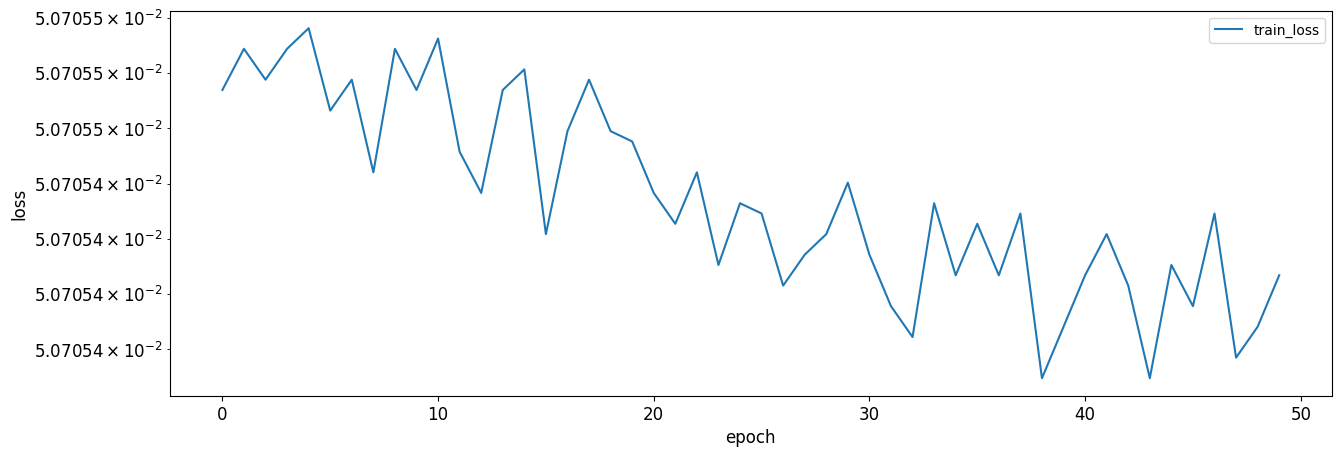

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

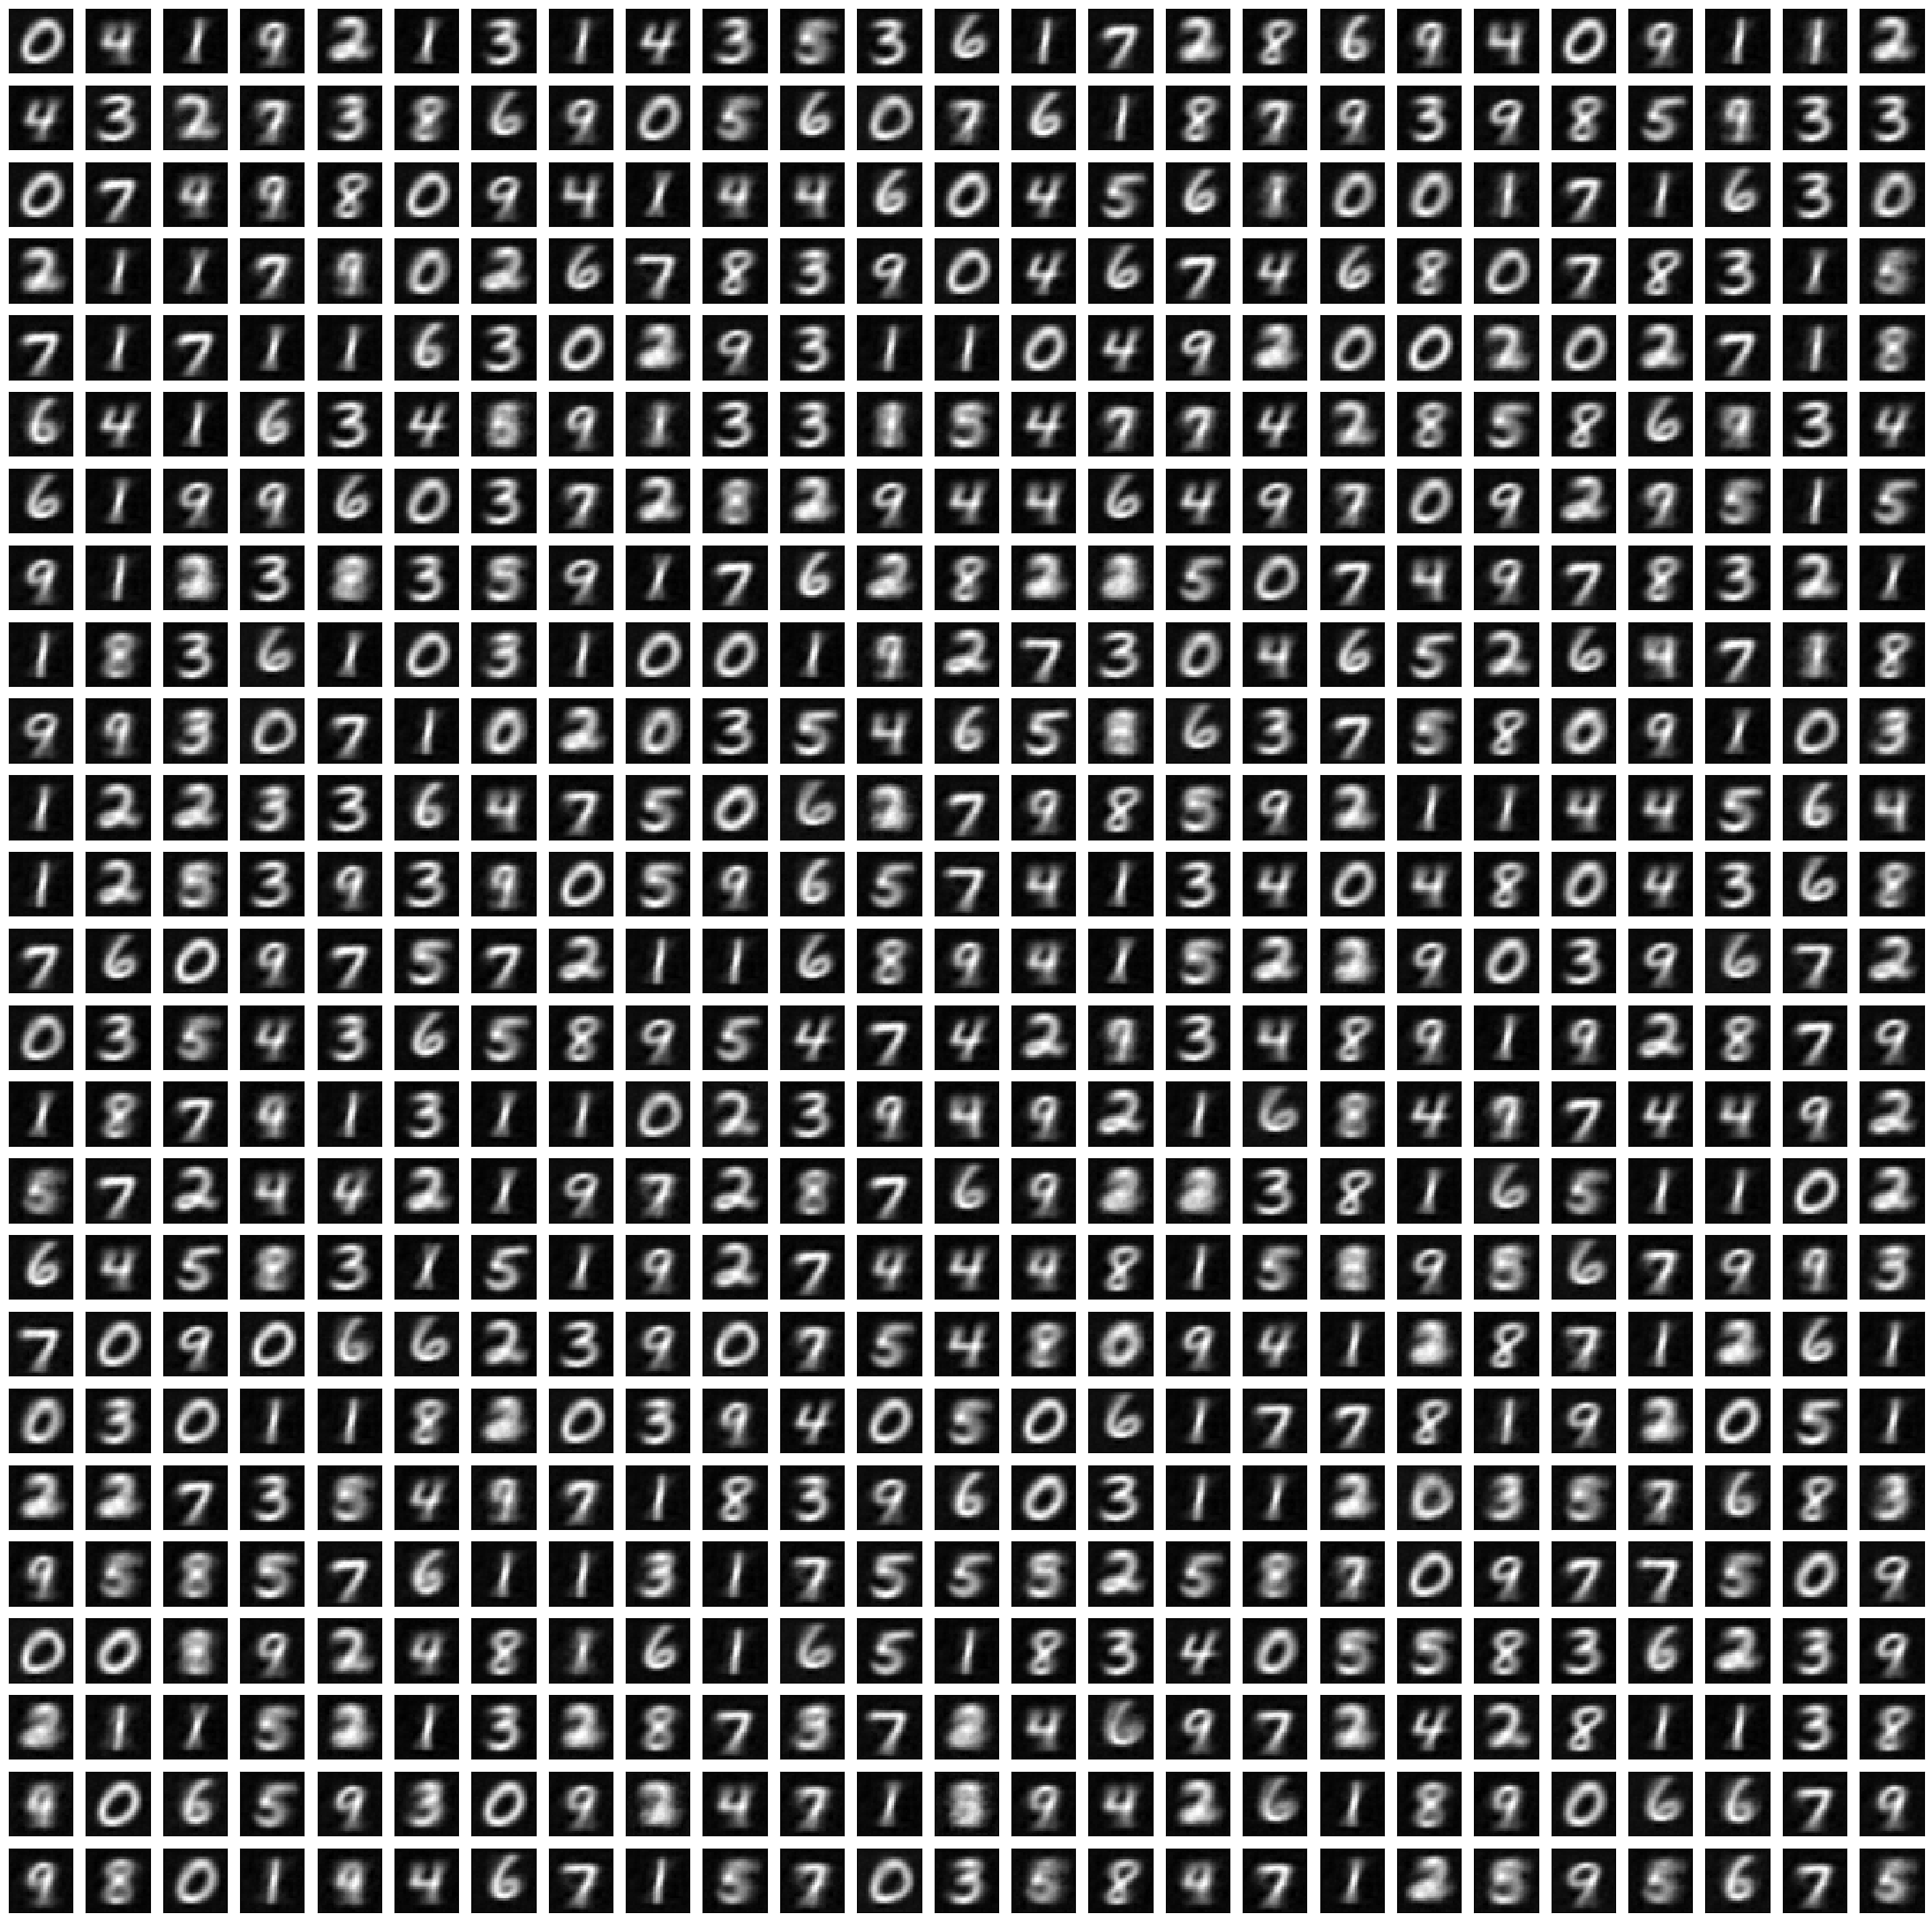

In [ ]:
fig = plt.figure(figsize=(28,28))

decoded_images = decoder.predict(x_proj, verbose=False)

ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind)
        plt.imshow(decoded_images[ind].reshape((28,28)), cmap = "gray", interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1

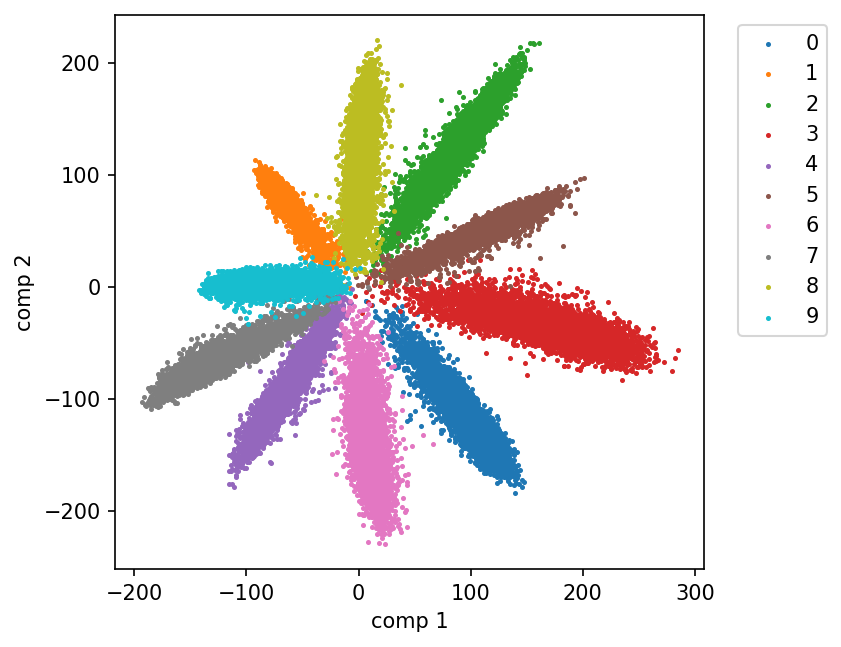

In [ ]:
fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*x_proj[y_train == i].T, label=i, s=2)


ax.legend(bbox_to_anchor=(1.04, 1))
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_aspect('equal', 'box')

plt.show()

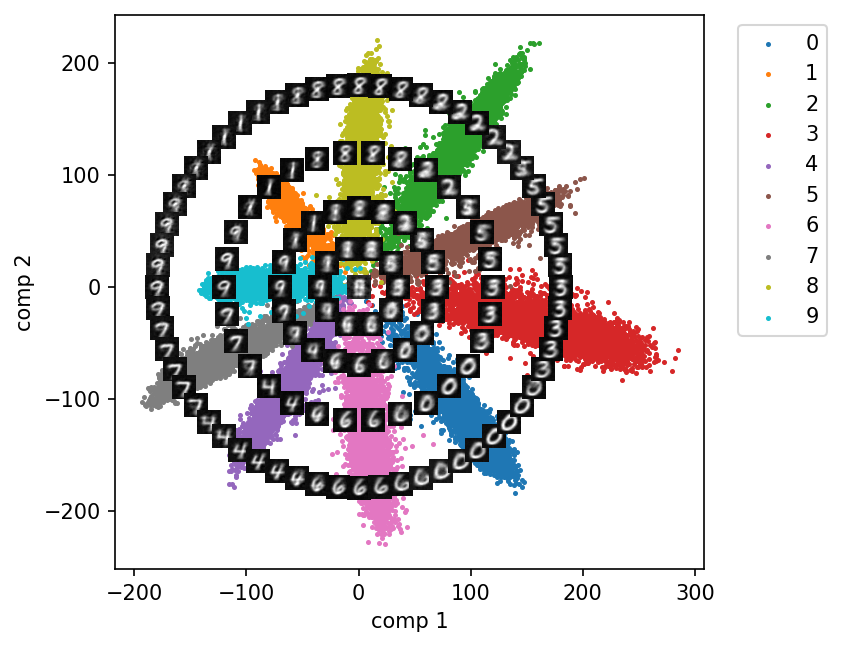

In [ ]:
clear_artists(ax)

circle_path(radius=180, center=(0, 0), n_images=60, ax=ax)
circle_path(radius=120, center=(0, 0), n_images=30, ax=ax)
circle_path(radius=70, center=(0, 0), n_images=20, ax=ax)
circle_path(radius=35, center=(0, 0), n_images=10, ax=ax)
circle_path(radius=0, center=(0, 0), n_images=1, ax=ax)

fig

<font color="green">
Atividade (c) <br>
Se necessário, redefina os valores de [center], [radius] e [n_images] para que as amostras excursionem por toda a distribuição de códigos. Em outras palavras, não deixe nenhuma região colorida sem amostras.
</font>

<font color="green">
Atividade (d) <br>
Qual foi a estratégia adotada para que o código do autoencoder fizesse o desemaranhamento (disentanglement) das classes? É sempre possível adotar esta estratégia ao se treinar um autoencoder?
</font>

**Resposta:**

Para que houvesse um desemaranhamento das classes, inicialmente houve um pré-treinamento do encoder com uma tarefa de pretexto de classificação, realizada a partir da inclusão de uma camada softmax ao fim do encoder, dessa forma, o código gerado pelo encoder é utilizado pela camada de classificação para prever a classe do dado de entrada. Dessa forma, por trabalhar com classificação, o encoder aprende não só como os dados se comportam e seus padrões, mas também como eles se agrupam, devido aos rótulos de classificação. Com isso, o código tende a separar as classes espacialmente, de forma que a função softmax consiga definir com facilidade qual a classe do dado de entrada.

Essa estratégia não é universal, uma vez que nem sempre os dados possuem rótulos como o MNIST, onde cada imagem apresenta apenas uma característica, ou seja, um rótulo universal. Por exemplo, autoencoders utilizados em arquiteturas de segmentação semântica de imagens, como a SegNet, as imagens não possuem um rótulo com apenas uma informação, mas sim uma matriz de mesmo tamanho da imagem de entrada com a segmentação de imagem correta.